# Teste para Análise de Dados **senhasegura**

# 1 Introdução 
Este projeto tem como foco a análise de dados de vendas de uma loja online para o teste de Estágio em Dados da senhasegura, com objetivo principal de manipular os dados , realizar uma analise exploratoria e fazer um insight detalhado dos resultados obtidos.  

### 1.1- Objetivos Específicos 
- **Limpeza e Preparação dos Dados**: Será feita a verificacao de dados ausentes , como tambem edicao de alguns dados para melhor visualizacao.
- **Analise exploratoria dos Dados**: Será feita uma analise aprofundada para entendelos melhor e assim conseguir insights e resultados mais precisos.
- **Resultados e Analises Obtidos**: Ao final com todos os dados em maos sera feita uma analise aprofunda dos dados e assim feita algumas sugestoes de melhorias.

### 1.2- Ferramentas e Metodologia
- **Ferramentas Utilizadas**: Python e Jupyter Notebooks para análise de dados, com bibliotecas como Pandas, Plotly, Matplotlib e Seaborn para manipulação de dados e visualizações.
- **Abordagem de Análise**: A análise será conduzida através de uma combinação de estatísticas descritivas, visualizações de dados, e exploração de variáveis específicas que são potencialmente relevantes para o Teste.

Com esses objetivos e ferramentas em mente, procederemos com a análise detalhada dos dados fornecidos.

 ### 1.3- Importação das Bibliotecas
 
 Importação das bibliotecas necessárias.

In [17]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
import os
from datetime import datetime

#Cores a serem ultilizadas nos graficos 
colorsbar = ['#086365','#80b9b8']
color1 = ['#086365']
if not os.path.exists('imgs'):
    os.makedirs('imgs')
vendas=[]

### 2 - Limpeza e Preparcao dos Dados

Importação dos dados do arquivo csv para um dataframe do pandas.

In [18]:
data=pd.read_csv('dados_de_vendas.csv')

### 2.1- Descrição das Colunas do Conjunto de Dados

Este conjunto de dados contém algumas colunas que fornecem informações sobre as vendas. Abaixo está uma descrição breve de cada coluna:

- **ID da Venda**: Identificador único da venda
 - **Data da Venda**: Data da venda (formato: AAAA-MM-DD)
 - **Produto**: Nome do produto vendido
 - **Categoria**: Categoria do produto
 - **Preço Unitário**: Preço de venda de uma unidade do produto
 - **Quantidade**: Quantidade do produto vendida
 - **Cidade**: Cidade onde a venda foi realizada
 - **Estado**: Estado onde a venda foi realizada

### 2.2 - Verificacao da Quantidade de Dados e Atributos  

In [19]:
df = pd.read_csv('dados_de_vendas.csv')

# Obter a quantidade de linhas e colunas
num_linhas, num_colunas = df.shape

print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 3000
Número de colunas: 8


Podemos observar que o conjunto de dados possui 3000 linhas e 8 colunas, o que representa 10.000 vendas e 8 atributos que descrevem cada venda.

### 2.3 - Verificação de Valores Ausentes

In [20]:
missing_data = data.isnull().sum()
missing_data

ID da Venda       0
Data da Venda     0
Produto           0
Categoria         0
Preço Unitário    0
Quantidade        0
Cidade            0
Estado            0
dtype: int64

Aqui pode ser notado que nao há nenhum valor ausente, entao verifica-se que nao e necessario fazer nenhuma alteracao

### 2.4 - Conversao da coluna "Data da Venda" para o formato AAAA-MM-DD

In [21]:


# Inicializar a lista de vendas
vendas = []

# Abrir e ler o arquivo CSV
with open('dados_de_vendas.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Converter 'Data da Venda' de string para objeto de data
        row['Data da Venda'] = datetime.strptime(row['Data da Venda'], '%Y-%m-%d')

        # Adicionar a venda à lista
        vendas.append(row)

## 3 - Análise Exploratória dos Dados

### 3.1 - Calculo do valor total de cada venda 

In [22]:
for venda in vendas:
    # Converter 'Preço Unitário' e 'Quantidade' para os tipos numéricos corretos
    venda['Preço Unitário'] = float(venda['Preço Unitário'])
    venda['Quantidade'] = int(venda['Quantidade'])
    
    # Agora realizar a multiplicação corretamente
    venda['Valor Total'] = venda['Preço Unitário'] * venda['Quantidade']
  

Aqui foi feito o calculo do valor total de cada venda 

### 3.2 - Produto mais vendido 

In [23]:
produtos_vendidos = {}
for venda in vendas:
    produto = venda['Produto']
    produtos_vendidos[produto] = produtos_vendidos.get(produto, 0) + venda['Quantidade']

produto_mais_vendido = max(produtos_vendidos, key=produtos_vendidos.get)
print(f"Produto mais vendido: {produto_mais_vendido}")

Produto mais vendido: Moletom


Aqui notamos que o produto mais vendido pela loja foi moletom 

### 3.3 - Categoria com maior receita total 

In [24]:
# Categoria de produto com maior receita total
receita_por_categoria = {}
for venda in vendas:
    categoria = venda['Categoria']
    receita_por_categoria[categoria] = receita_por_categoria.get(categoria, 0) + venda['Valor Total']

categoria_maior_receita = max(receita_por_categoria, key=receita_por_categoria.get)
print(f"Categoria com maior receita: {categoria_maior_receita}")

Categoria com maior receita: Roupas


Aqui notamos que a categoria com maior receita foi Roupas 

### 3.4 - Media de gasto por venda em cada cidade

In [25]:
total_por_cidade = {}
vendas_por_cidade = {}

for venda in vendas:
    cidade = venda['Cidade']
    total_por_cidade[cidade] = total_por_cidade.get(cidade, 0) + venda['Valor Total']
    vendas_por_cidade[cidade] = vendas_por_cidade.get(cidade, 0) + 1

media_gasto_cidade = {cidade: total_por_cidade[cidade] / vendas_por_cidade[cidade] for cidade in total_por_cidade}
print(f"{'Cidade':<15}{'Média de Gasto':<15}")
print("-" * 30)
for cidade, media in media_gasto_cidade.items():
    print(f"{cidade:<15}{media:<15.2f}")

Cidade         Média de Gasto 
------------------------------
Rio de Janeiro 356.88         
Porto Alegre   325.17         
Goiânia        334.95         
Curitiba       326.23         
Salvador       312.99         
Manaus         314.80         
Belo Horizonte 323.90         
Fortaleza      338.71         
Recife         320.61         
São Paulo      324.46         


Aqui notamos que Rio de Janeiro e a cidade que tem a maior media de gastos enquanto Sao Paulo tem a menor.

In [26]:
status_count = data['Cidade'].value_counts()
status_count

Cidade
Curitiba          328
Manaus            324
Porto Alegre      311
Goiânia           305
São Paulo         300
Salvador          297
Fortaleza         296
Rio de Janeiro    285
Belo Horizonte    277
Recife            277
Name: count, dtype: int64

Curitiba é a cidade com a maior quantidade de compras 

### 3.5 - Gráfico de Barra

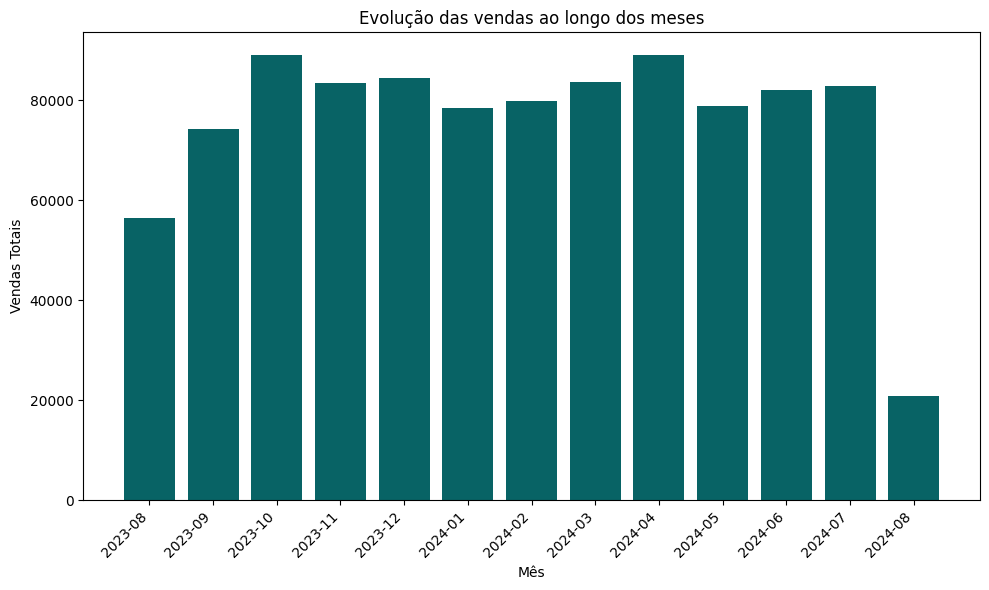

In [29]:
# Ordenar os dados por ano e mês
vendas_por_mes_ordenado = dict(sorted(vendas_por_mes.items(), key=lambda x: (x[0][0], x[0][1])))

# Preparar os rótulos e valores para o gráfico
meses_ordenados = [f"{ano}-{mes:02d}" for ano, mes in vendas_por_mes_ordenado.keys()]
valores_ordenados = vendas_por_mes_ordenado.values()

# Criar gráfico de barras ordenado corretamente
plt.figure(figsize=(10, 6))
plt.bar(meses_ordenados, valores_ordenados, color=color1)
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Evolução das vendas ao longo dos meses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafico de Barras mostrando as vendas em 1 ano a partir de Agosto de 2023 a Agosto de 2024 

### 3.6 Gráfico de Pizza 

In [28]:
# Dados para o gráfico de pizza
status = data['Categoria'].unique()
counts = data['Categoria'].value_counts()

# Criando o gráfico de pizza com o Plotly
fig = px.pie(names=status, values=counts, title='Distribuição de Vendas por Categoria de Produtos ', color_discrete_sequence=colorsbar)
fig.write_image("imgs/status.png")
fig.show()

Grafico de pizza onde podemos ver que teve uma maior venda na categoria de roupas do que calçados 